# Predicting the risk of CHD

## Bayesian network that guarantees the best results in predicting the risk of CHD

### Introduction
Cardiovascular diseases are the number one cause of death worldwide; around 17.9 million
people die each year, which represents 31% of all deaths worldwide. Cardiovascular diseases are
a group of disorders of the heart and blood vessels and include coronary heart disease (CHD),
cerebrovascular disease, rheumatic heart disease, and other conditions. Thus, CHD continues to
be a leading cause of morbidity and mortality among adults. It is a disease of the blood vessels
supplying the heart, i.e., the heart’s blood supply is blocked or interrupted by a build-up of fatty
substances in the coronary arteries. Hence, we intend to predict a 10-year risk of CHD in patients
using Bayesian networks. The original data are from a large cohort from the BioLINCC website.

### Dataset
In the late 1940s, the U.S. Government set out to better understand cardiovascular disease (CVD).
So, the plan was to track a large cohort of initially healthy patients over time. The city of
Framingham, Massachusetts, was selected as a site for study due to the appropriate size, stable
population, and cooperative doctors and residents. The study began in 1948. The original cohort
has 5209 patients aged between 30 and 59 years old. The patients underwent questionnaires and
exams every two weeks to assess physical and behavioral characteristics.
The key to successful prediction of CHD is identifying important risk scores, which are variables
that increase the chances of disease. So, we will investigate risk factors collected in the first data
collection for the study, which is an anonymized version of the original data.
The current data for this project has 4240 patients with the following variables:
Demographic risk factors:
• Sex: sex of patient
• age: age in years at first examination
• education: some high school (1), high school/GED (2), some college/vocational school (3), college (4)
Behavioral risk factors:
• currentSmoker, cigsPerDay: smoking behaviorMedical history risk factors:
 • BPMeds: on blood pressure medication at the time of first examination
• prevalentStroke: previously had a stroke
• prevalentHyp: currently hypertense
• diabetes: currently has diabetes Risk factors from the first examination:
• totChol: total cholesterol (mg/dL)
• sysBP: systolic blood pressure
• diaBP: diastolic blood pressure
• BMI: body mass index, weight(kg)/height(m)2
• heartRate: heart rate (beats/minute)
• glucose: blood glucose level (mg/dL)
The last variable in the dataset is the target variable (TenYearCHD) which tells us if the patient will have or not the disease.

### Main Goal
The main goal of this project is to implement a Bayesian network that guarantees the best results in predicting the risk of CHD. Thus, you need to learn a Bayesian network for the dataset described above.
The dataset has 15 features (without considering the target variable). If you are experiencing
memory problems in learning your Bayesian network, you can do a feature selection and select
the most relevant ones.

 Run the following code line to install the package in your Python environment.

In [1]:
#modules to install 
!pip install pgmpy

In [2]:
# Import Modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#  Phases

- Load Data

- Exploratory Data Analysis (EDA) 

- Data Preparation
-- Slit X_train y_train, X_test y_test (X keep target y)
-- Apply column_tranformation  pipeline (15 features->18 features)
-- Create and apply feature selection (18 feat-> 8 + Target)

- Learn a Bayesian network from the data (with the corresponding parameters)

- Validation of the results (Assess the classification results when you predict the target variable)
-- Validate (Accuracy Train dataset)
-- Test (Accuracy Test dataset)



##  Load Data


In [3]:
import numpy as np
import pandas as pd

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator


chd_df_full = pd.read_csv("CHD_dataset.csv")

# dataframe shape 
print ( f" \n chd_df_full shape {chd_df_full.shape} \n")

# show first 5 column
print (f"chd_df_full.head() \n {chd_df_full.head()}")

 
 chd_df_full shape (4240, 16) 

chd_df_full.head() 
       Sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39        4.0            No         0.0     0.0                0   
1  female   46        2.0            No         0.0     0.0                0   
2    male   48        1.0           Yes        20.0     0.0                0   
3  female   61        3.0           Yes        30.0     0.0                0   
4  female   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0       No    195.0  106.0   70.0  26.97       80.0     77.0   
1             0       No    250.0  121.0   81.0  28.73       95.0     76.0   
2             0       No    245.0  127.5   80.0  25.34       75.0     70.0   
3             1       No    225.0  150.0   95.0  28.58       65.0    103.0   
4             0       No    285.0  130.0   84.0  23.10       85.0     85.0

## Exploratory Data Analysis (EDA)

a) Get a quick description of the data, in particular:
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many... dataset["x"].value_counts()
- number of non-null values
- summary of the numerical attributes

b) Histograms (for each numerical attribute)
- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

c) Check for outliers

d) Check for duplicates

e) Looking for correlations

f) Experimenting with attribute combinations

g) Findings

### a) Get a quick description of the data


In [4]:
chd_df_full.info()

"""
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many... dataset["x"].value_counts()
---> Sex, currentSmoker, diabetes: categories explore
- number of non-null values
---> null: education (mean, sex based?); cigsPerDay (if current smoker mean else 0 (the null values all smoke)); BPMeds (mean); totChol (mean); BMI (mean); hearRate (mean); glucose (mean)
"""

chd_df_full.describe()

"""
- summary of the numerical attributes; Analyze?
---> scaler: age;cigsPerDay;totChol; sysBP;diaBP;BMI; heartRate; glucose; Analyze?    
0 or 1 maintain: BPMeds;prevalentStroke; prevalentHyp;  
    
'totChol'; 'sysBP'; 'diaBP', 'BMI'; 'heartRate';'glucose'   

# Result: treat outliers - Scaling
# StandardScaler is  less affected by outliers then min-max scaling for standardization. 
# min-max between 0 and 1 is better for choose features...  
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 530.1+ KB


"\n- summary of the numerical attributes; Analyze?\n---> scaler: age;cigsPerDay;totChol; sysBP;diaBP;BMI; heartRate; glucose; Analyze?    \n0 or 1 maintain: BPMeds;prevalentStroke; prevalentHyp;  \n    \n'totChol'; 'sysBP'; 'diaBP', 'BMI'; 'heartRate';'glucose'   \n\n# Result: treat outliers - Scaling\n# StandardScaler is  less affected by outliers then min-max scaling for standardization. \n# min-max between 0 and 1 is better for choose features...  \n"

In [5]:
# categorical attribute: find out what categories exist and how many
# Sex, currentSmoker, diabetes: categories explore

display (chd_df_full["Sex"].value_counts())
display (chd_df_full["currentSmoker"].value_counts())
display (chd_df_full["diabetes"].value_counts())


female    2420
male      1820
Name: Sex, dtype: int64

No     2145
Yes    2095
Name: currentSmoker, dtype: int64

No     4131
Yes     109
Name: diabetes, dtype: int64

### b) Histograms (for each numerical attribute)

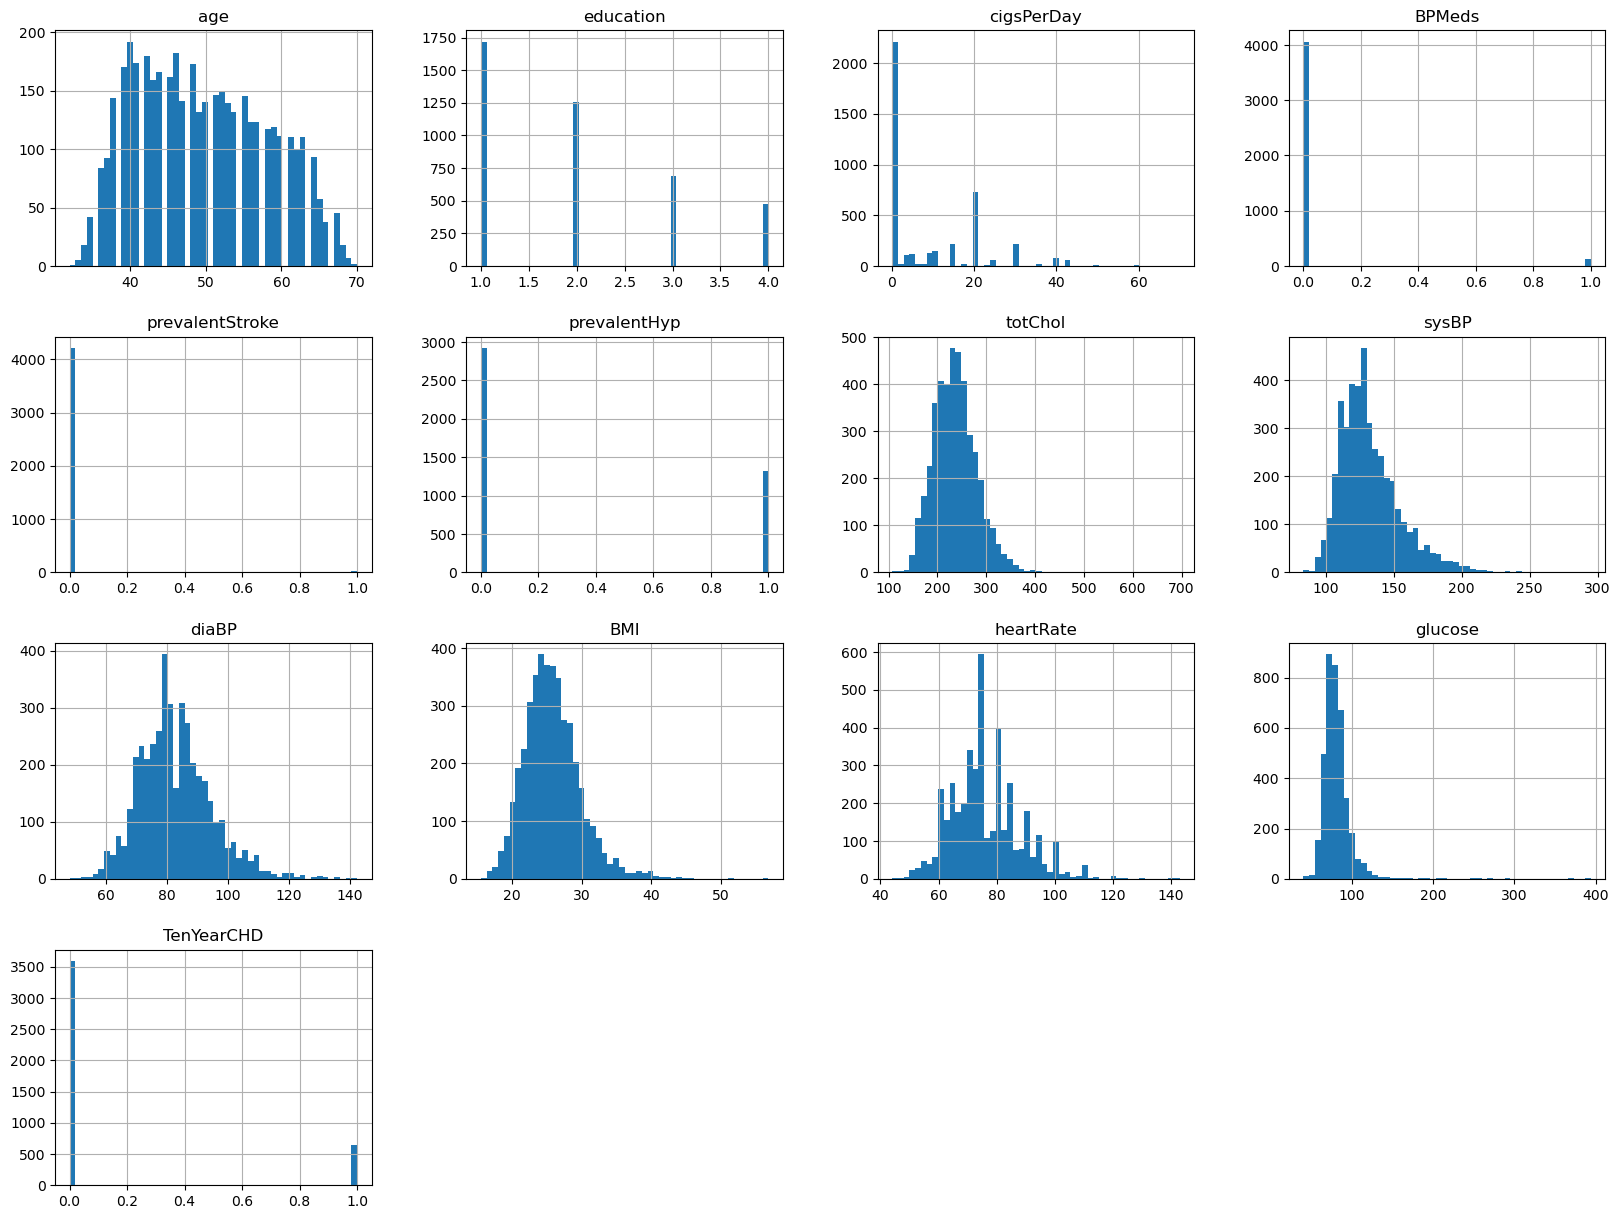

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

chd_df_full.hist(bins=50, figsize=(20,15))
plt.show()

#-> Create a new category?  cigsPerDay (nop)


### c) Check for outliers

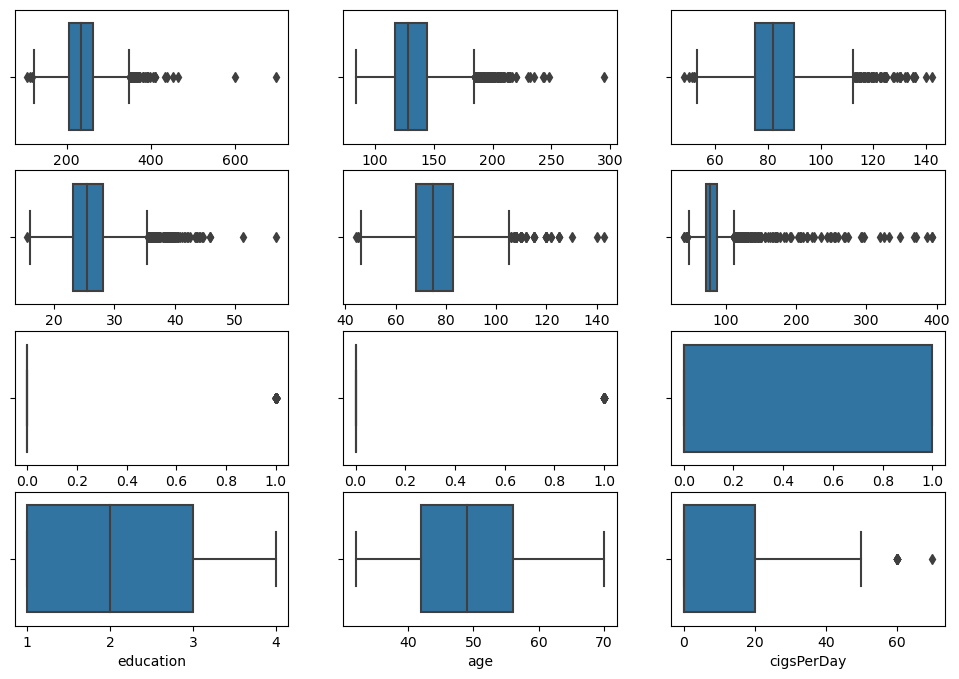

In [8]:
# Check for outliers

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
sns.boxplot(x=chd_df_full['totChol'], ax=axs[0, 0])
sns.boxplot(x=chd_df_full['sysBP'], ax=axs[0, 1])
sns.boxplot(x=chd_df_full['diaBP'], ax=axs[0, 2])
sns.boxplot(x=chd_df_full['BMI'], ax=axs[1, 0])
sns.boxplot(x=chd_df_full['heartRate'], ax=axs[1, 1])
sns.boxplot(x=chd_df_full['glucose'], ax=axs[1, 2])
sns.boxplot(x=chd_df_full['BPMeds'], ax=axs[2, 0])
sns.boxplot(x=chd_df_full['prevalentStroke'], ax=axs[2, 1])
sns.boxplot(x=chd_df_full['prevalentHyp'], ax=axs[2, 2])
sns.boxplot(x=chd_df_full['education'], ax=axs[3, 0])
sns.boxplot(x=chd_df_full['age'], ax=axs[3, 1])
sns.boxplot(x=chd_df_full['cigsPerDay'], ax=axs[3, 2])

plt.show()

# Result: treat outliers - Scaling
# StandardScaler is  less affected by outliers then min-max scaling for standardization. 
# min-max between 0 and 1 is better for choose features...  

### d) Check for duplicates

In [9]:
duplicates = chd_df_full.duplicated().sum()
print(f"chd_df_full.duplicated().sum() \n {duplicates} \n")

chd_df_full.duplicated().sum() 
 0 



### e) Looking for Correlations 

In [10]:
corr_matrix = chd_df_full.corr() 
#Now let’s look at how much each attribute correlates with the TenYearCHD value:
corr_matrix["TenYearCHD"].sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12412\365080906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = chd_df_full.corr()


TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
education         -0.054248
Name: TenYearCHD, dtype: float64

array([[<Axes: xlabel='TenYearCHD', ylabel='TenYearCHD'>,
        <Axes: xlabel='age', ylabel='TenYearCHD'>,
        <Axes: xlabel='sysBP', ylabel='TenYearCHD'>,
        <Axes: xlabel='prevalentHyp', ylabel='TenYearCHD'>,
        <Axes: xlabel='diaBP', ylabel='TenYearCHD'>,
        <Axes: xlabel='glucose', ylabel='TenYearCHD'>],
       [<Axes: xlabel='TenYearCHD', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sysBP', ylabel='age'>,
        <Axes: xlabel='prevalentHyp', ylabel='age'>,
        <Axes: xlabel='diaBP', ylabel='age'>,
        <Axes: xlabel='glucose', ylabel='age'>],
       [<Axes: xlabel='TenYearCHD', ylabel='sysBP'>,
        <Axes: xlabel='age', ylabel='sysBP'>,
        <Axes: xlabel='sysBP', ylabel='sysBP'>,
        <Axes: xlabel='prevalentHyp', ylabel='sysBP'>,
        <Axes: xlabel='diaBP', ylabel='sysBP'>,
        <Axes: xlabel='glucose', ylabel='sysBP'>],
       [<Axes: xlabel='TenYearCHD', ylabel='prevalentHyp'>,
        <Axes: xlab

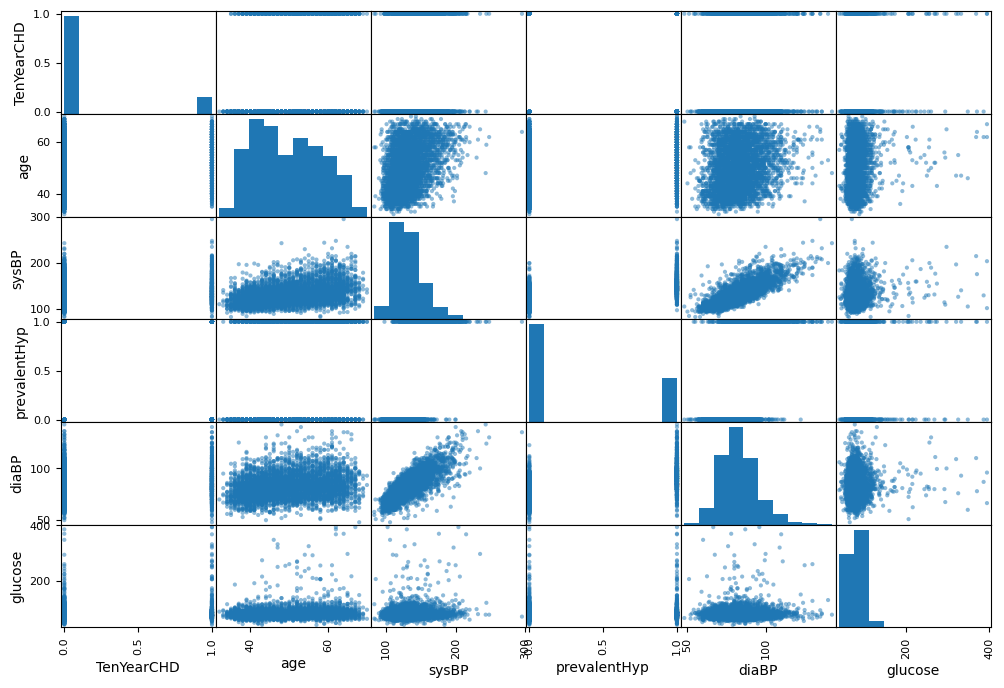

In [11]:
#  let’s just focus on a few promising attributes that seem most correlated with the TenYearCHD 

from pandas.plotting import scatter_matrix 

attributes = ["TenYearCHD", "age", "sysBP", "prevalentHyp","diaBP", "glucose"] 
scatter_matrix(chd_df_full[attributes], figsize=(12, 8))

<Axes: xlabel='glucose', ylabel='TenYearCHD'>

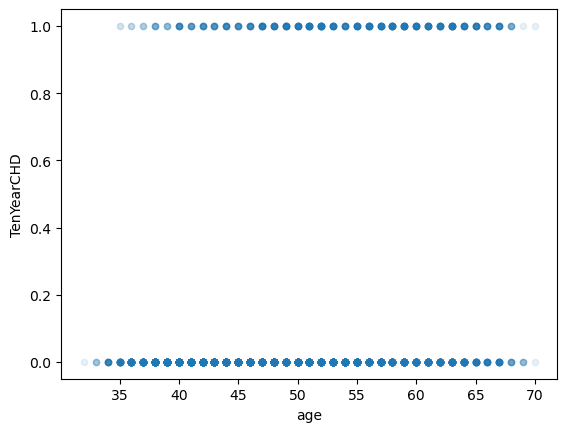

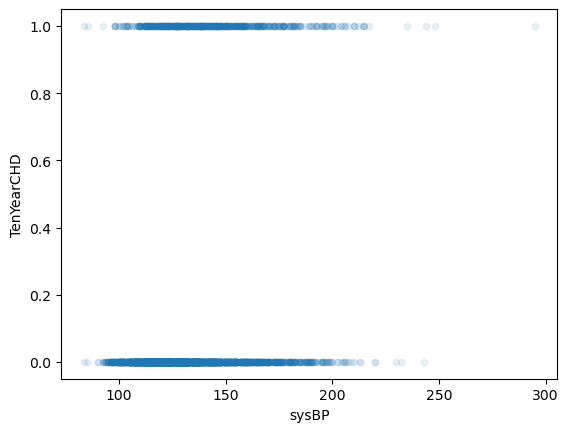

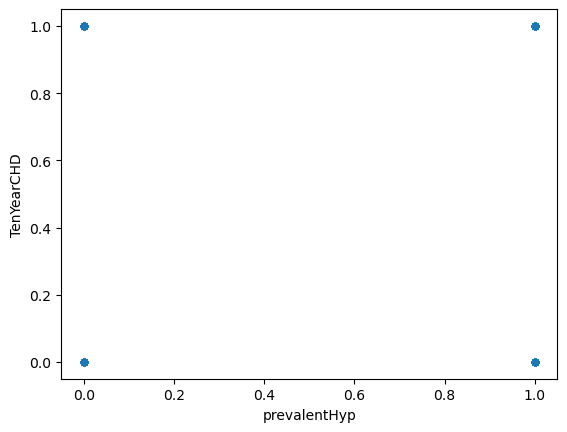

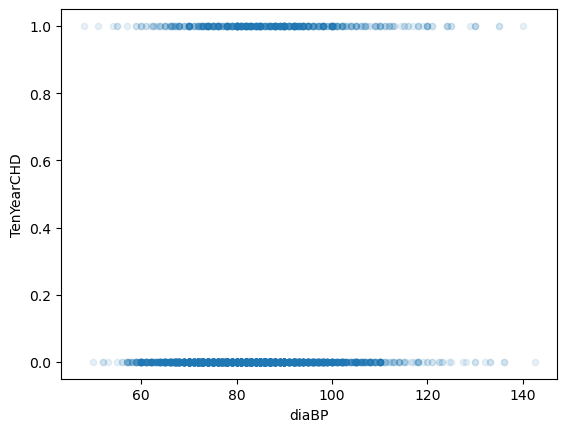

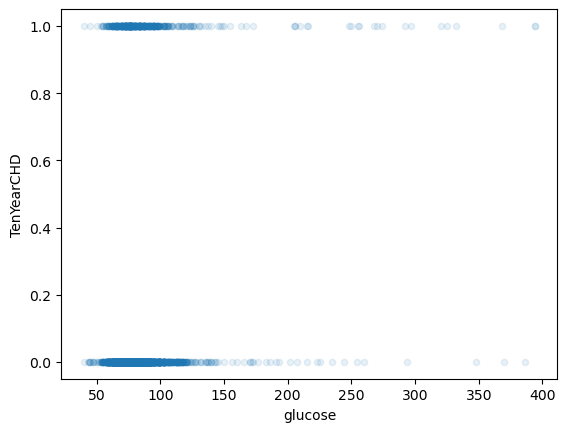

In [12]:
# zoom most promising attribute to predict the TenYearCHD 

chd_df_full.plot(kind="scatter", x="age", y="TenYearCHD", alpha=0.1)
# Result 
chd_df_full.plot(kind="scatter", x="sysBP", y="TenYearCHD", alpha=0.1)
chd_df_full.plot(kind="scatter", x="prevalentHyp", y="TenYearCHD", alpha=0.1)
chd_df_full.plot(kind="scatter", x="diaBP", y="TenYearCHD", alpha=0.1)
chd_df_full.plot(kind="scatter", x="glucose", y="TenYearCHD", alpha=0.1)

# Result 

In [13]:
from collections import Counter

# summarize TenYearCHD distribution
counter = Counter(chd_df_full['TenYearCHD'])
print(counter)
print('Positive TenYearCHD corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

Counter({0: 3596, 1: 644})
Positive TenYearCHD corresponds to 15.188679245283017 % of the dataset.


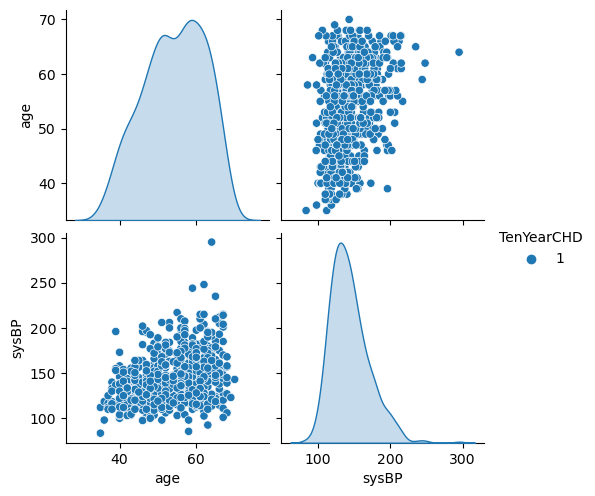

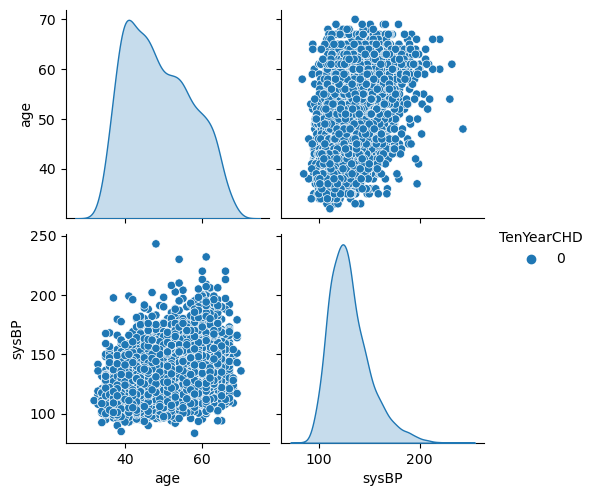

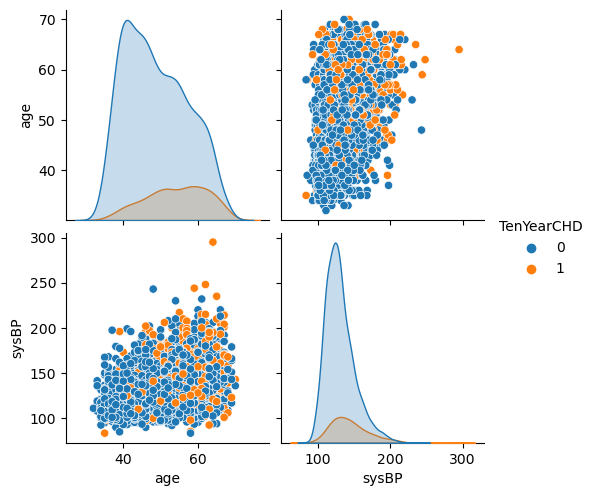

In [15]:
# Visualize the data "age", "sysBP", "prevalentHyp","diaBP", "glucose"]

sns.pairplot(chd_df_full [chd_df_full['TenYearCHD'] == 1], vars=['age', 'sysBP'], hue='TenYearCHD')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

#just for non frauds
sns.pairplot(chd_df_full [chd_df_full['TenYearCHD'] == 0], vars=['age', 'sysBP'], hue='TenYearCHD')

#all
sns.pairplot(chd_df_full , vars=['age', 'sysBP'], hue='TenYearCHD')

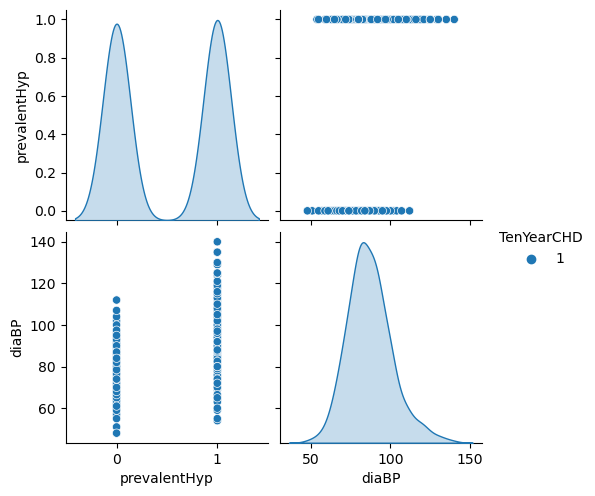

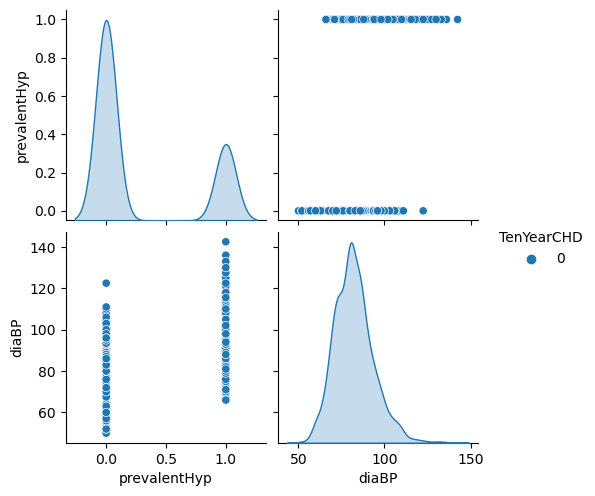

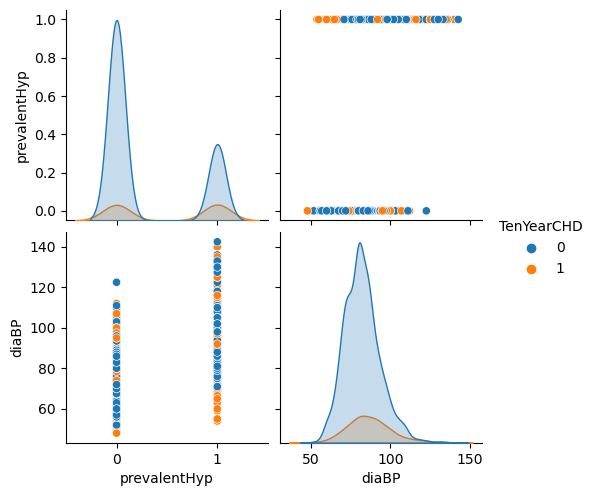

In [16]:
# Visualize the data "age", "sysBP", "prevalentHyp","diaBP", "glucose"]

sns.pairplot(chd_df_full [chd_df_full['TenYearCHD'] == 1], vars=['prevalentHyp', 'diaBP'], hue='TenYearCHD')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

#just for non frauds
sns.pairplot(chd_df_full [chd_df_full['TenYearCHD'] == 0], vars=['prevalentHyp', 'diaBP'], hue='TenYearCHD')

#all
sns.pairplot(chd_df_full , vars=['prevalentHyp', 'diaBP'], hue='TenYearCHD')

### f) Experimenting with attribute combinations



### g) Findings

relation between the first 3 to 8 features



## Data preparation


Some of the basic pre-processing techniques:
1. Conversion of data – models can only handle numeric features; hence, categorical and ordinal data must be
somehow converted into numeric features
Results-> Sex, currentSmoker, diabetes convert to categories

2. Scaling data – many modelling approaches require some uniformity in the independent variables. Some datasets
 - Common scaling methods: standardisation, range scaling, power transform, unit norm scaling, custom scaling
Results-> numerical does not seens to have some outliers that may disrupt model results
scaler to numeric: age; education (is numeric categorie), cigsPerDay; totChol; sysBP; diaBP; BMI; heartRate; glucose;   
0 or 1 also (they will have means for nan): BPMeds; prevalentStroke; prevalentHyp;  

3. Missing values – do nothing, ignore or impute them.
Results-> nan: education (mean); cigsPerDay (if current smoker mean else 0 (the null values all smoke)); BPMeds (mean); totChol (mean); BMI (mean); hearRate (mean); glucose (mean)

4. Outliers detection – there are some error data that might be present in our dataset that deviates drastically from
other observations in a dataset (for example, human weight = 800kg; due to mistyping of extra 0)
Results-> scaling

5. Check for duplicates
Results-> There is not duplicates

Apply pipeline to atributes in dataframe in order to preprocessing and features extraction
- Handling Text and Categorical Attributes (01)
- Scaling (02) (04) to all numerical: StandardScaler (is much less affected by outliers then min-max scaling) or min-max scaling
- Data Cleaning (03) NA - Missing values
- Data Cleaning (05) Duplicates,  no need

### Define and test column transformation

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Check for duplicates
duplicates = chd_df_full.duplicated().sum()
print(f"chd_df_full.duplicated().sum() \n {duplicates} \n")
if duplicates > 0:
    # Remove duplicates
    chd_df_full.drop_duplicates(inplace=True) #modify the original dataframe instead of creating a new one. 
    print(f"After remove duplicates chd_df_full.duplicated().sum() \n {chd_df_full.duplicated().sum()} \n")
    print ( f" \n chd_df_full shape {chd_df_full.shape} \n")

    
def sex_to_binary(df): # x
    return pd.DataFrame((df['Sex'].str.upper() == 'MALE').astype(int), columns=['Sex'])

def yes_false_binary_smoker (df): #x
    return pd.DataFrame((df['currentSmoker'].str.upper() == 'YES').astype(int), columns=['currentSmoker']) #2d array

def yes_false_binary_diabetes (df): #x
    return pd.DataFrame((df['diabetes'].str.upper() == 'YES').astype(int), columns=['diabetes']) #2d array

def binary_transform_BPMeds(df): #x
    return pd.DataFrame((df['BPMeds'].values != 0).astype(int), columns=['BPMeds']) #2d array
 
education_pipe = Pipeline(
    [
        ('naeducation', SimpleImputer(strategy="most_frequent"))
        , # ; median
        ('onehoteducation', OneHotEncoder(dtype='int')) #
        #('scaler', MinMaxScaler())
    ]
)

BPMeds_pipe = Pipeline(
    [
        ('naBPMeds', SimpleImputer(strategy="most_frequent"))
        #, # ; median
        #('binBPMeds', FunctionTransformer (binary_transform_BPMeds))
    ]
)
       
#Column transformation, implements Data Preparation 
column_trans = ColumnTransformer(
    [       
        ('sex_tranf', FunctionTransformer(sex_to_binary), ['Sex']), #output 2d
        ('education_tranf', education_pipe, ['education']),
        ('currentSmoker_tranf', FunctionTransformer(yes_false_binary_smoker), ['currentSmoker']),
        ('cigsPerDay_tranf', SimpleImputer(strategy="mean"), ['cigsPerDay']), # mean could be float
        ('BPMeds_tranf', BPMeds_pipe, ['BPMeds']),
        ('diabetes_tranf', FunctionTransformer(yes_false_binary_diabetes), ['diabetes']),
        ('totChol_tranf', SimpleImputer(strategy="mean"), ['totChol']), # mean could be float
        ('BMI_tranf', SimpleImputer(strategy="mean"), ['BMI']), # mean could be float
        ('heartRate_tranf', SimpleImputer(strategy="mean"), ['heartRate']), # mean could be float
        ('glucose_tranf', SimpleImputer(strategy="mean"), ['glucose']) # mean could be float        
    ],
       remainder = 'passthrough', #the others features not changed will remain in the dataset
)

# sequence of transformed features (all)
transformed_features = ['Sex', 'education1','education2','education3','education4','currentSmoker', 'cigsPerDay','BPMeds', 'diabetes', 'totChol',  'BMI', 'heartRate', 'glucose', 'age','prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP', 'TenYearCHD']


print ("column_trans.fit_transform(chd_df_full): apply to dataframe chd_df_full \n", column_trans.fit_transform(chd_df_full)) #apply transformers to all dataframe contratsAPFit
print ("column_trans.get_feature_names_out(): features that have been created with preprocessing and feature extraction extract \n", column_trans.get_feature_names)
# i´m not making any attribution of value to the return of column_trans just using the values
# to see how is the transformation


"""
# I could have applied this transformation directly in the dataset but i want that the transformation be in the pipeline
# in order to be used with all the others and reduce error

def sex_to_binary(x):
    return (x == 'male').astype(int)

df['Sex'] = df['Sex'].apply(sex_to_binary)
"""

chd_df_full.duplicated().sum() 
 0 

column_trans.fit_transform(chd_df_full): apply to dataframe chd_df_full 
 [[  1.    0.    0.  ... 106.   70.    0. ]
 [  0.    0.    1.  ... 121.   81.    0. ]
 [  1.    1.    0.  ... 127.5  80.    0. ]
 ...
 [  0.    0.    1.  ... 133.5  83.    0. ]
 [  1.    0.    0.  ... 141.   98.    0. ]
 [  0.    0.    0.  ... 133.   86.    0. ]]
column_trans.get_feature_names_out(): features that have been created with preprocessing and feature extraction extract 
 <bound method ColumnTransformer.get_feature_names of ColumnTransformer(remainder='passthrough',
                  transformers=[('sex_tranf',
                                 FunctionTransformer(func=<function sex_to_binary at 0x000001B65C005360>),
                                 ['Sex']),
                                ('education_tranf',
                                 Pipeline(steps=[('naeducation',
                                                  SimpleImputer(strategy='most_frequent')),
  

"\n# I could have applied this transformation directly in the dataset but i want that the transformation be in the pipeline\n# in order to be used with all the others and reduce error\n\ndef sex_to_binary(x):\n    return (x == 'male').astype(int)\n\ndf['Sex'] = df['Sex'].apply(sex_to_binary)\n"

### Retrieve Class (y) from the dataset (X)
Separate the features and target variable

Nevertheless for validate the Learn of a Bayesian network from the data (with the corresponding parameters) we will need y gather in X_train and X_test


In [18]:
# Separate the features and target variable

# summarize TenYearCHD distribution
counter = Counter(chd_df_full['TenYearCHD'])
print(counter)
print('Positive TenYearCHD corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')


chd_df = chd_df_full.drop(['TenYearCHD'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)
y = chd_df_full['TenYearCHD'] # targuet .copy()?

print ( f" \n chd_df shape {chd_df.shape} \n")
# show first 5 column
print (f"chd_df.head() \n {chd_df.head()}")

print ( f" \n y shape \n {y.shape} \n")
# show first 5 column
print (f"y.head() \n {y.head()}")

# summarize TenYearCHD distribution
counter = Counter(y)
print(counter)
print('Positive TenYearCHD corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

# Nevertheless for validate the Learn of a Bayesian network from the data (with the corresponding parameters) 
# we will need y gather in X_train and X_test
chd_df_y = chd_df
chd_df_y["TenYearCHD"] = y 
print ( f" \n chd_df_y shape {chd_df_y.shape} \n")
# show first 5 column
print (f"chd_df_y.head() \n {chd_df_y.head()}")


Counter({0: 3596, 1: 644})
Positive TenYearCHD corresponds to 15.188679245283017 % of the dataset.
 
 chd_df shape (4240, 15) 

chd_df.head() 
       Sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39        4.0            No         0.0     0.0                0   
1  female   46        2.0            No         0.0     0.0                0   
2    male   48        1.0           Yes        20.0     0.0                0   
3  female   61        3.0           Yes        30.0     0.0                0   
4  female   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0       No    195.0  106.0   70.0  26.97       80.0     77.0  
1             0       No    250.0  121.0   81.0  28.73       95.0     76.0  
2             0       No    245.0  127.5   80.0  25.34       75.0     70.0  
3             1       No    225.0  150.0   95.0  28.58       65.0  

## Split Data
Let's split the data into train and test sets.

In [19]:
chd_df = chd_df_y # AT having Y in the dataset....
print ( f" \n chd_df shape {chd_df.shape} \n")
# show first 5 column
print (f"chd_df.head() \n {chd_df.head()}")

 
 chd_df shape (4240, 16) 

chd_df.head() 
       Sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39        4.0            No         0.0     0.0                0   
1  female   46        2.0            No         0.0     0.0                0   
2    male   48        1.0           Yes        20.0     0.0                0   
3  female   61        3.0           Yes        30.0     0.0                0   
4  female   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0       No    195.0  106.0   70.0  26.97       80.0     77.0   
1             0       No    250.0  121.0   81.0  28.73       95.0     76.0   
2             0       No    245.0  127.5   80.0  25.34       75.0     70.0   
3             1       No    225.0  150.0   95.0  28.58       65.0    103.0   
4             0       No    285.0  130.0   84.0  23.10       85.0     85.0   

   Te

In [20]:
from sklearn.model_selection import train_test_split

# Nevertheless for validate the Learn of a Bayesian network from the data (with the corresponding parameters) 
# we will need y gather in X_train and X_test, so chd_df includes also y) 
X_train, X_test, y_train, y_test = train_test_split(chd_df, y, test_size=0.3, random_state=42)

In [21]:
print ( f"X_train \n {X_train} \n len X_train {len (X_train)}" )
print (f"X_train.shape {X_train.shape}")
print ( f"y_train \n {y_train} \n len y_train {len (y_train)}")
print (f"y_train.shape {y_train.shape}")

# summarize class distribution
counter = Counter(y_train)
print(counter)
print('In Training DataSet Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

X_train 
          Sex  age  education currentSmoker  cigsPerDay  BPMeds  \
4097    male   54        2.0           Yes        40.0     0.0   
3165    male   44        3.0           Yes        30.0     0.0   
2499  female   46        2.0           Yes        15.0     0.0   
3345    male   38        2.0           Yes        15.0     0.0   
3596    male   40        2.0           Yes        15.0     0.0   
...      ...  ...        ...           ...         ...     ...   
3444  female   36        1.0           Yes         5.0     0.0   
466   female   57        3.0           Yes        15.0     0.0   
3092  female   60        2.0            No         0.0     0.0   
3772    male   39        2.0           Yes        10.0     0.0   
860   female   35        2.0            No         0.0     0.0   

      prevalentStroke  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
4097                0             0       No    245.0  152.0   82.0  23.71   
3165                0             0      

###  Apply Pipeline column_trans to X_train an X_test

In [22]:

# just data processing

full_attribs = list(X_train) # have a list of attributes to apply transformer
print (f"X_train full_attribs before data processing-> {full_attribs}")

# show first 5 lines of the transformed features
print (f"X_train.head(5) \n {X_train.head(5)}")


# show first 5 lines of the transformed features
print (f"X_test.head(5) \n {X_test.head(5)}")

chd_df_nparray_data_processed_X_train = column_trans.fit_transform(X_train) # just X 
chd_df_nparray_data_processed_X_test = column_trans.fit_transform(X_test) # just X 

#features names 
#print (f"\n column_trans.get_feature_names() {column_trans.get_feature_names()}") #not all the features has...

print ("Data Preparation")
############## 'TenYearCHD' ########################AT
print (f"\n transformed_features {transformed_features}")
       
chd_df_data_processed_X_train = pd.DataFrame(chd_df_nparray_data_processed_X_train, columns=transformed_features)
chd_df_data_processed_X_test = pd.DataFrame(chd_df_nparray_data_processed_X_test, columns=transformed_features)


# dataframe shape 
print ( f" \n chd_df_data_processed_X_train shape {chd_df_data_processed_X_train.shape} \n")
print ( f" \n chd_df_data_processed_X_test shape {chd_df_data_processed_X_test.shape} \n")

###data_processed_attribs = list(chd_df_data_processed) # have a list of attributes to apply transformer
###print (f"data_processed_attribs -> {data_processed_attribs}")

# show first 5 lines of the transformed features
print (f"chd_df_data_processed_X_train.head(5) \n {chd_df_data_processed_X_train.head(5)}")
print (f"chd_df_data_processed_X_test.head(5) \n {chd_df_data_processed_X_test.head(5)}")

print (chd_df_data_processed_X_train.info())
print (chd_df_data_processed_X_train.describe())

print (chd_df_data_processed_X_test.info())
print (chd_df_data_processed_X_test.describe())

X_train full_attribs before data processing-> ['Sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
X_train.head(5) 
          Sex  age  education currentSmoker  cigsPerDay  BPMeds  \
4097    male   54        2.0           Yes        40.0     0.0   
3165    male   44        3.0           Yes        30.0     0.0   
2499  female   46        2.0           Yes        15.0     0.0   
3345    male   38        2.0           Yes        15.0     0.0   
3596    male   40        2.0           Yes        15.0     0.0   

      prevalentStroke  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
4097                0             0       No    245.0  152.0   82.0  23.71   
3165                0             0       No    363.0  140.0   87.0  26.44   
2499                0             0       No    232.0  115.0   70.0  25.18   
3345                0             0  

               Sex   education1   education2   education3   education4  \
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean      0.429245     0.410377     0.294811     0.174528     0.120283   
std       0.495163     0.492096     0.456137     0.379712     0.325420   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       currentSmoker   cigsPerDay       BPMeds     diabetes      totChol  \
count    1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean        0.455975     8.579447     0.029874     0.022799   236.347861   
std         0.498254    12.105368     0.170307     0.149320    47.252126   
min         0.000000     0.00

### Define and apply Feature selection to X_train X_test
Select the most relevant ones, i.e., select the k features with the highest score. For that, you may
consider the SelectKBest function from scikit-learn with chi2 as the score function.
However, you are free to choose a different feature selection approach or criterion. Even if you are not experiencing memory issues in learning your model, you are free to try feature selection to improve model performance.



In [23]:

from sklearn.feature_selection import SelectKBest, chi2


print (f" chd_df_data_processed_X_train.shape {chd_df_data_processed_X_train.shape}")
print (f"y_train.shape, {y_train.shape}")

print (f" chd_df_data_processed_X_test.shape {chd_df_data_processed_X_test.shape}")


def AnalizeFeaturesSel (skb, features_processed):
        # The higher the score, the more important the feature is
        print("Scores:", skb.scores_)

        # The p-values of the features represent the probability that the null hypothesis is true, 
        # i.e., that the feature is not related to the target variable.
        print("P-values:", skb.pvalues_)

        # Print the number of features seen during fit
        print("Number of features seen during fit:", skb.n_features_in_)

        # Print the names of features seen during fit (if available)
        if hasattr(skb, 'feature_names_in_'):
            print("Feature names seen during fit:", skb.feature_names_in_)

        # Create a dataframe with feature names, scores, and p-values
        #df_score_features = pd.DataFrame({'Feature name': chd_df_data_processed_X_train.columns, #ok
        #df_score_features = pd.DataFrame({'Feature name': skb.feature_names_in_,
        df_score_features = pd.DataFrame({'Feature name': features_processed,
                    'Scores': skb.scores_,
                   'P-values': skb.pvalues_})

            
        # Sort the dataframe by the highest scores in descending order
        df_score_features = df_score_features.sort_values(by='Scores', ascending=False)

        # Print the first 17 rows of the dataframe
        print ("\n Feature Selection for CHD: The higher the score, the more important the feature is ")
        print(df_score_features.head(len (features_processed))) #17
        print ("P-values: probability that the null hypothesis is true, i.e., that the feature is not related to the target variable")
        print ("\n")
        
# Create a SelectKBest object with k=8 (plus target) TenYearCHD
skb = SelectKBest(chi2, k=9)

# Fit the object to your data: chd_df_data_processed_X_train
skb.fit(chd_df_data_processed_X_train, y_train)

# Analize results
AnalizeFeaturesSel (skb, chd_df_data_processed_X_train.columns)

# Transform the data to include only the selected features
X_train_new = skb.transform(chd_df_data_processed_X_train)
X_test_new = skb.transform(chd_df_data_processed_X_test)

# Create a new dataframe with the selected features
chd_X_train_data_proc_fsel = pd.DataFrame(X_train_new, columns=chd_df_data_processed_X_train.columns[skb.get_support()])
chd_X_test_data_proc_fsel = pd.DataFrame(X_test_new, columns=chd_df_data_processed_X_test.columns[skb.get_support()])

print(f"chd_X_train_data_proc_fsel.info() {chd_X_train_data_proc_fsel.info()}")
print(f"chd_X_train_data_proc_fsel.describe() {chd_X_train_data_proc_fsel.describe()}")

print(f"chd_X_test_data_proc_fsel.info() {chd_X_test_data_proc_fsel.info()}")
print(f"chd_X_test_data_proc_fsel.describe() {chd_X_test_data_proc_fsel.describe()}")

 chd_df_data_processed_X_train.shape (2968, 19)
y_train.shape, (2968,)
 chd_df_data_processed_X_test.shape (1272, 19)
Scores: [7.17932100e+00 9.99004816e+00 8.42830522e+00 1.55239768e+00
 4.08547599e-03 4.06021565e-02 1.12015479e+02 1.52814979e+01
 1.61949407e+01 6.67574177e+01 1.33622380e+01 1.63274144e+00
 1.75670089e+02 2.39849839e+02 1.34996207e+01 7.07418877e+01
 5.55617922e+02 1.28970850e+02 2.51900000e+03]
P-values: [7.37486125e-003 1.57388488e-003 3.69424507e-003 2.12781827e-001
 9.49035736e-001 8.40307811e-001 3.54531320e-026 9.26192755e-005
 5.71465352e-005 3.07059828e-016 2.56741746e-004 2.01324288e-001
 4.27442777e-040 4.24079579e-054 2.38611683e-004 4.07155255e-017
 7.54874734e-123 6.88217347e-030 0.00000000e+000]
Number of features seen during fit: 19
Feature names seen during fit: ['Sex' 'education1' 'education2' 'education3' 'education4' 'currentSmoker'
 'cigsPerDay' 'BPMeds' 'diabetes' 'totChol' 'BMI' 'heartRate' 'glucose'
 'age' 'prevalentStroke' 'prevalentHyp' 'sysBP

## Learn a Bayesian network from the data (with the corresponding parameters)

#### HillClimbSearch
Heuristic to learn a Bayesian network from the data

Defining the model structure
Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.
Score-based approach
Pros:
- Can handle nonlinear relationships between variables 
- Can be more accurate than constraint-based methods when the sample size is small


In [24]:
# from pgmpy.estimators import ExhaustiveSearch # we do not want  Exhaustive search
from pgmpy.estimators import HillClimbSearch # Heuristic for search baysian model with best score

from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

# ExhaustiveSearch # we do not want  Exhaustive search
#bic = BicScore(file_df)
#es = ExhaustiveSearch(file_df, scoring_method=bic)
#best_model = es.estimate()
#print(best_model.edges())
#print("\nAll DAGs by score:")
#for score, dag in reversed(es.all_scores()):
#    print(score, dag.edges())

hc = HillClimbSearch(chd_X_train_data_proc_fsel)
best_model = hc.estimate(scoring_method=BicScore(chd_X_train_data_proc_fsel))
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('prevalentHyp', 'diaBP'), ('prevalentHyp', 'sysBP'), ('prevalentHyp', 'diabetes'), ('prevalentHyp', 'age'), ('TenYearCHD', 'prevalentHyp')]


#### Hybrid
Best of breed 
- use constraint-based methods
- use hill climb search to orient the edges
test with 3 scoring_method=K2Score; BDeuScore and BicScore

Note: it takes a while to run....

In [38]:
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore, BicScore, K2Score

mmhc = MmhcEstimator(chd_X_train_data_proc_fsel)
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())

# use hill climb search to orient the edges:
hc = HillClimbSearch(chd_X_train_data_proc_fsel)
model = hc.estimate(tabu_length=10, white_list=skeleton.to_directed().edges(), scoring_method=K2Score(chd_X_train_data_proc_fsel))
# use 3 scoring methods: BDeuScore, BicScore, K2Score
print("Part 2) Model:    ", model.edges())


Part 1) Skeleton:  [('cigsPerDay', 'age'), ('diabetes', 'glucose'), ('totChol', 'age'), ('totChol', 'sysBP'), ('age', 'sysBP'), ('sysBP', 'diaBP')]


  0%|          | 0/1000000 [00:00<?, ?it/s]

Part 2) Model:     []


"Result test k2 or other\nPart 1) Skeleton:  [('cigsPerDay', 'age'), ('totChol', 'age'), ('totChol', 'sysBP'), ('glucose', 'prevalentHyp'), ('age', 'sysBP'), ('prevalentHyp', 'sysBP'), ('sysBP', 'diaBP')]\n0%\n1/1000000 [00:00<51:15:04, 5.42it/s]\nPart 2) Model:     [('prevalentHyp', 'sysBP')]\n\nBDeuScore\nPart 1) Skeleton:  [('cigsPerDay', 'diabetes'), ('totChol', 'age'), ('totChol', 'sysBP'), ('glucose', 'sysBP'), ('glucose', 'diaBP'), ('age', 'prevalentHyp'), ('prevalentHyp', 'sysBP')]\n0%\n2/1000000 [00:00<32:04:57, 8.66it/s]\nPart 2) Model:     [('prevalentHyp', 'age'), ('sysBP', 'prevalentHyp')]\n\nPart 1) Skeleton:  [('cigsPerDay', 'diabetes'), ('totChol', 'age'), ('totChol', 'sysBP'), ('glucose', 'sysBP'), ('glucose', 'diaBP'), ('age', 'prevalentHyp'), ('prevalentHyp', 'sysBP')]\n0%\n2/1000000 [00:00<57:42:32, 4.81it/s]\nPart 2) Model:     [('prevalentHyp', 'age'), ('sysBP', 'prevalentHyp')]\nscoring_method=BDeuScore\n"

#### Corresponding parameters

#Learning of the Bayesian network with the corresponding parameters
"""The parameters of a Bayesian network are the conditional probability distributions (CPDs) associated with each node 
in the network. Each CPD specifies the probability distribution of a node given its parents in the network.
We learned a Bayesian network from  data using ----- HillClimbSearch or  HYBRID algorithm. The
resulting model is represented by a DAG, and each node in the DAG corresponds to a variable in your data. The parameters of 
the model are the CPDs associated with each node in the DAG.
To compute the parameters of your model, we are using the MaximumLikelihoodEstimator? and  BayesianEstimator? classes
from pgmpy.estimators

In [26]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import K2Score,BicScore, BDeuScore

from pgmpy.models import BayesianModel
from sklearn.model_selection import cross_val_score

#test with HillClimbSearch, also do it for Hybrid (with bmedges = model.edges())
bmedges = best_model.edges()

print(f"we will use edges  {bmedges}")

# Create a Bayesian model (from  edges)
model = BayesianModel(bmedges)

# Get the nodes of your model
nodes = model.nodes()
print(f"\n\n Nodes: {nodes}\n\n")

# Add the nodes that are missing
all_nodes = chd_X_train_data_proc_fsel.columns
for node in all_nodes:
    if node not in nodes:
        model.add_node(node)
        print(f"\n node add to BayesianModel: {node}")
        
print(f"\n\n Nodes: {nodes}\n\n")

#Estimate the parameters of the model using maximum likelihood estimation
mle = MaximumLikelihoodEstimator(model, chd_X_train_data_proc_fsel)

# Add the CPDs to the model
for cpd in mle.get_parameters():
    # Associating the CPDs with the network
    model.add_cpds(cpd)
    print(f"\n cpd added {cpd}")

model.fit (chd_X_train_data_proc_fsel, estimator = MaximumLikelihoodEstimator)
    
print (f"\n CPD in model:  \n {model.get_cpds()}")
print (f"\n model.check_model(): {model.check_model()}")

we will use edges  [('prevalentHyp', 'diaBP'), ('prevalentHyp', 'sysBP'), ('prevalentHyp', 'diabetes'), ('prevalentHyp', 'age'), ('TenYearCHD', 'prevalentHyp')]


 Nodes: ['prevalentHyp', 'diaBP', 'sysBP', 'diabetes', 'age', 'TenYearCHD']



 node add to BayesianModel: cigsPerDay

 node add to BayesianModel: totChol

 node add to BayesianModel: glucose


 Nodes: ['prevalentHyp', 'diaBP', 'sysBP', 'diabetes', 'age', 'TenYearCHD', 'cigsPerDay', 'totChol', 'glucose']



 cpd added +-------------------+-------------------+---------------------+
| TenYearCHD        | TenYearCHD(0.0)   | TenYearCHD(1.0)     |
+-------------------+-------------------+---------------------+
| prevalentHyp(0.0) | 0.722508932115919 | 0.48106904231625836 |
+-------------------+-------------------+---------------------+
| prevalentHyp(1.0) | 0.277491067884081 | 0.5189309576837416  |
+-------------------+-------------------+---------------------+

 cpd added +--------------+-----------------------+-----------------

#### Validate the model

To validate a Bayesian network, we can use a variety of methods such as 
a) cross-validation, b) likelihood-based scoring, or  c) information criteria.

a) Cross-validation: This method involves splitting  data into training and testing sets,
fitting the Bayesian network to the training set, and then evaluating its performance on the testing set. 
metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the model.
can not manage to use  typical cross_validation due to:
-- the BayesianModel does not implement a 'get_params' method.
(type <class 'pgmpy.models.BayesianModel.BayesianModel'>): it does not seem to be a scikit-learn estimator as it does 
not implement a 'get_params' method.
-- neither to import bn_cv (from R...) 

b) Likelihood-based scoring: This method involves computing the likelihood of the data given the Bayesian network 
and comparing it to the likelihood of the data given a null model (e.g., a model with no edges). 
Use metrics such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) 
to compare the performance of different models.

In Bayesian network structure learning, the K2 score, BIC score, and BDeu score are used to evaluate the 
quality of a learned model.
- The K2 score is a measure of the goodness of fit of a model to the data. It is based on the likelihood of the 
data given the model and takes into account the complexity of the model. The higher the K2 score, the better
the fit of the model to the data.
- The BIC score is similar to the K2 score but includes a penalty term for model complexity. 
The penalty term is proportional to the number of parameters in the model. 
The BIC score tends to favor simpler models over more complex ones.
- The BDeu score is another measure of goodness of fit that takes into account both the likelihood of the data
given the model and a prior distribution over the parameters. 
The prior distribution is typically chosen to be uniform or Dirichlet. 
The BDeu score tends to favor models that are consistent with the prior distribution.

c) Information criteria: These are statistical measures that balance model fit and complexity. They can be used to 
compare different models and select the one that best fits the data
Bayesian network structure learning include the Bayesian Information Criterion (BIC), 
Akaike Information Criterion (AIC), and Deviance Information Criterion (DIC)...K2 and BDeu too....

In [27]:
from pgmpy.inference import VariableElimination

# Compute the K2 score of your model
k2 = K2Score(chd_X_train_data_proc_fsel).score(model)
print(f"K2 score: {k2}")

# Compute the BIC score of your model
bic = BicScore(chd_X_train_data_proc_fsel).score(model)
print(f"BIC score: {bic}")

# Compute the BDeu score of your model
bdeu = BDeuScore(chd_X_train_data_proc_fsel, equivalent_sample_size=5).score(model)
print(f"BDeu score: {bdeu}")


# Assess the classification results when you predict the target variable.

# Create a variable elimination object
infer = VariableElimination(model)

# Predict the values of TenYearCHD given evidence
#[('diabetes', 'prevalentHyp'), ('prevalentHyp', 'diaBP'), ('prevalentHyp', 'sysBP'), ('prevalentHyp', 'age')]
#evidence = {'age': 50, 'sex': 'male', 'cigsPerDay': 10, 'totChol': 200, 'sysBP': 180, 'diaBP': 120, 'BMI': 25, 'heartRate': 70, 'glucose': 100}
#evidence = {'age': 52, 'cigsPerDay': 30, 'totChol': 328, 'sysBP': 180, 'diaBP': 120, 'glucose': 120, 'prevalentHyp': 1, 'diabetes': 0}

evidence = {'totChol': 328, 'sysBP': 180}

# query for new values
#query = infer.map_query(['TenYearCHD'], evidence=evidence)

query = infer.query(['TenYearCHD'], evidence=evidence)



#print(f"Probability of TenYearCHD: {query['TenYearCHD'][1]}")
print(f"Probability of TenYearCHD: {query}")

#print(f"Probability of TenYearCHD: {query['TenYearCHD']}") # w/ map_query ok e querynok





K2 score: -72860.24319642429
BIC score: -75338.96425727305
BDeu score: -74519.6565651238
Probability of TenYearCHD: +-----------------+-------------------+
| TenYearCHD      |   phi(TenYearCHD) |
+=================+===================+
| TenYearCHD(0.0) |            0.7500 |
+-----------------+-------------------+
| TenYearCHD(1.0) |            0.2500 |
+-----------------+-------------------+


C:\Users\User\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


### Validate (Accuracy Training dataset)

In [31]:
    from sklearn.metrics import accuracy_score
    
         
    print (f"chd_X_train_data_proc_fsel.info {chd_X_train_data_proc_fsel.info}")
    print (f"\n chd_X_train_data_proc_fsel['TenYearCHD'].info {chd_X_train_data_proc_fsel['TenYearCHD'].info}")
         
    predicted_labels = model.predict(chd_X_train_data_proc_fsel.drop('TenYearCHD', axis=1))
    true_labels = chd_X_train_data_proc_fsel['TenYearCHD']
    accuracy = accuracy_score(true_labels, predicted_labels) 
    print("Accuracy Training dataset:", accuracy)


chd_X_train_data_proc_fsel.info <bound method DataFrame.info of       cigsPerDay  diabetes  totChol  glucose   age  prevalentHyp  sysBP  \
0           40.0       0.0    245.0     75.0  54.0           0.0  152.0   
1           30.0       0.0    363.0     79.0  44.0           0.0  140.0   
2           15.0       0.0    232.0     59.0  46.0           0.0  115.0   
3           15.0       0.0    150.0     82.0  38.0           0.0  123.0   
4           15.0       0.0    200.0     67.0  40.0           0.0  122.5   
...          ...       ...      ...      ...   ...           ...    ...   
2963         5.0       0.0    222.0     71.0  36.0           1.0  147.0   
2964        15.0       0.0    250.0     72.0  57.0           0.0  125.0   
2965         0.0       0.0    298.0     81.0  60.0           1.0  133.0   
2966        10.0       0.0    215.0     62.0  39.0           0.0  102.0   
2967         0.0       0.0    248.0     80.0  35.0           0.0  107.0   

      diaBP  TenYearCHD  
0      82

  0%|          | 0/2968 [00:00<?, ?it/s]

Accuracy Training dataset: 0.8487196765498652


### Test (Accuracy Test dataset)
Eventually error when we have values to predict that are not in CPD indexes.....

In [37]:
    print (f"Before cast to integer \n")
    print (f"chd_X_test_data_proc_fsel.info \n {chd_X_test_data_proc_fsel.info}")
    print (f"chd_X_test_data_proc_fsel.describe \n {chd_X_test_data_proc_fsel.describe}")

    #Data process for X_test 
    # print (f"predicted_labels, {predicted_labels}")
    chd_X_test_data_proc_fsel['cigsPerDay'] = chd_X_test_data_proc_fsel['cigsPerDay'].apply(int)
    chd_X_test_data_proc_fsel['diabetes'] = chd_X_test_data_proc_fsel['diabetes'].apply(int)
    chd_X_test_data_proc_fsel['totChol'] = chd_X_test_data_proc_fsel['totChol'].apply(int)
    chd_X_test_data_proc_fsel['glucose'] = chd_X_test_data_proc_fsel['glucose'].apply(int)
    chd_X_test_data_proc_fsel['age'] = chd_X_test_data_proc_fsel['age'].apply(int)
    chd_X_test_data_proc_fsel['prevalentHyp'] = chd_X_test_data_proc_fsel['prevalentHyp'].apply(int)
    chd_X_test_data_proc_fsel['sysBP'] = chd_X_test_data_proc_fsel['sysBP'].apply(int)
    chd_X_test_data_proc_fsel['diaBP'] = chd_X_test_data_proc_fsel['diaBP'].apply(int)

    print (f"After cast to integer \n")
    print (f"chd_X_test_data_proc_fsel.info \n {chd_X_test_data_proc_fsel.info}")
    print (f"chd_X_test_data_proc_fsel.describe \n {chd_X_test_data_proc_fsel.describe}")

"""print (f"predicted_labels with ints, {chd_X_test_data_proc_fsel}")
    print ("\n\n print spcific lines")
    print (f"chd_X_test_data_proc_fsel 275 {chd_X_test_data_proc_fsel.iloc[275]}")
    print (f"chd_X_test_data_proc_fsel 276 {chd_X_test_data_proc_fsel.iloc[276]}")
    print (f"chd_X_test_data_proc_fsel 277 {chd_X_test_data_proc_fsel.iloc[277]}")
"""

    #First 2 rows
    true_labels = chd_X_train_data_proc_fsel['TenYearCHD'].iloc[:200]#.head(1)
    print (f"true_labels {true_labels}")

    data_to_predict = model.predict(chd_X_test_data_proc_fsel.drop('TenYearCHD', axis=1).iloc[:200])
    print (f"data_to_predict {data_to_predict}")
    predicted_labels = model.predict(data_to_predict) #.iloc[0]
    accuracy = accuracy_score(true_labels, predicted_labels) 
    print("Accuracy:", accuracy)


Before cast to integer 

chd_X_test_data_proc_fsel.info 
 <bound method DataFrame.info of       cigsPerDay  diabetes  totChol  glucose  age  prevalentHyp  sysBP  diaBP  \
0             10         0      260       65   49             0    123     80   
1             25         0      201       91   43             0    121     82   
2              1         0      277       74   45             1    140     84   
3             10         0      236       74   63             1    189    103   
4              0         0      237       94   59             0    131     84   
...          ...       ...      ...      ...  ...           ...    ...    ...   
1267           3         0      326       77   67             1    157     78   
1268          30         0      292       69   39             1    153    100   
1269          15         0      222       68   55             1    155     92   
1270           3         0      247       69   49             0    121     82   
1271          25   

  0%|          | 0/200 [00:00<?, ?it/s]

IndexError: index 354 is out of bounds for axis 0 with size 231